In [311]:
from PCAfold import VQPCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from matplotlib.colors import ListedColormap
from PCAfold import get_centroids

In [312]:
n_points = 1000
save_filename = None
global_color = '#454545'
k1_color = '#0e7da7'
k2_color = '#ceca70'
color_map = ListedColormap([k1_color, k2_color])


In [313]:
mean_local_1 = [0,1]
mean_local_2 = [6,4]
covariance_local_1 = [[2, 0.5], [0.5, 0.5]]
covariance_local_2 = [[3, 0.3], [0.3, 0.5]]

x_noise_1, y_noise_1 = np.random.multivariate_normal(mean_local_1, covariance_local_1, n_points).T
x_noise_2, y_noise_2 = np.random.multivariate_normal(mean_local_2, covariance_local_2, n_points).T
x_local = np.concatenate([x_noise_1, x_noise_2])
y_local = np.concatenate([y_noise_1, y_noise_2])

Dataset_local = np.hstack((x_local[:,np.newaxis], y_local[:,np.newaxis]))

In [314]:
iris_df = datasets.load_iris(as_frame=True)
iris_df = iris_df.data

In [315]:
# Instantiate VQPCA class object:
vqpca = VQPCA(
    iris_df.to_numpy(),
    n_clusters=3,
    n_components=3,
    scaling='none',
    idx_init='random',
    random_state=42,
    max_iter=100,
    tolerance=1.0e-08,
    verbose=True
)

| It.   | Rec. error      | Error conv.? | Cent. conv.? | Cluster 1  | Cluster 2  | Cluster 3  | Time [min]   |
| 1     | 0.03926667      | False        | False        | 48         | 52         | 50         | 5e-05        |
| 2     | 0.01118571      | False        | False        | 53         | 46         | 51         | 8e-05        |
| 3     | 0.00821466      | False        | False        | 53         | 46         | 51         | 0.00012      |
| 4     | 0.00713893      | False        | False        | 51         | 49         | 50         | 0.00016      |
| 5     | 0.00645245      | False        | False        | 53         | 48         | 49         | 0.00021      |
| 6     | 0.00626216      | False        | False        | 57         | 47         | 46         | 0.0003       |
| 7     | 0.00609862      | False        | False        | 58         | 47         | 45         | 0.00034      |
| 8     | 0.005996        | False        | False        | 60         | 46         | 44         | 0.00037

In [316]:
centroids = get_centroids(iris_df.to_numpy(), vqpca.idx)

In [317]:
print(centroids)

[[5.75333333 2.99833333 3.84666667 1.39833333]
 [6.096      2.904      4.284      1.354     ]
 [5.6625     3.3375     2.9675     0.7075    ]]


In [318]:
from scipy.spatial.distance import cdist

# Compute pairwise Euclidean distances
distances = cdist(centroids, centroids, metric='euclidean')

print(distances)


[[0.         0.56528321 1.17195113]
 [0.56528321 0.         1.58964745]
 [1.17195113 1.58964745 0.        ]]


In [319]:
#eigenvectors0 = np.stack((vqpca.A[0][:, 0], vqpca.A[1][:, 0], vqpca.A[2][:, 0], vqpca.A[3][:, 0]))
#eigenvectors1 = np.stack((vqpca.A[0][:, 1], vqpca.A[1][:, 1], vqpca.A[2][:, 1], vqpca.A[3][:, 1]))
#eigenvectors2 = np.stack((vqpca.A[0][:, 2], vqpca.A[1][:, 2], vqpca.A[2][:, 2], vqpca.A[3][:, 2]))

In [320]:
eigenvectors0 = np.stack((vqpca.A[0][:, 0], vqpca.A[1][:, 0], vqpca.A[2][:, 0]))
eigenvectors1 = np.stack((vqpca.A[0][:, 1], vqpca.A[1][:, 1], vqpca.A[2][:, 1]))
eigenvectors2 = np.stack((vqpca.A[0][:, 2], vqpca.A[1][:, 2], vqpca.A[2][:, 2]))



In [321]:
#eigenvectors0 = np.stack((vqpca.A[0][:, 0], vqpca.A[1][:, 0]))
#eigenvectors1 = np.stack((vqpca.A[0][:, 1], vqpca.A[1][:, 1]))
#eigenvectors2 = np.stack((vqpca.A[0][:, 2], vqpca.A[1][:, 2]))

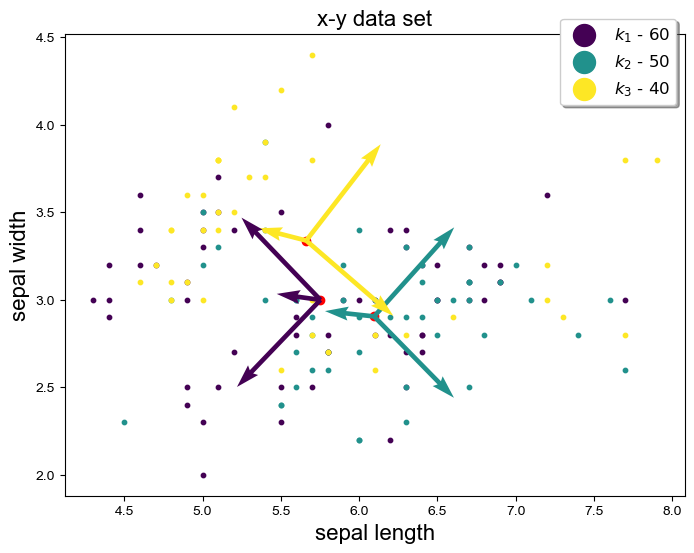

In [335]:
from PCAfold import variable_bins, plot_2d_clustering
import numpy as np

# Plot the clustering result:
plt = plot_2d_clustering(iris_df.to_numpy()[:, 0],
                     iris_df.to_numpy()[:, 1],
                     vqpca.idx,
                     x_label='sepal length',
                     y_label='sepal width',
                     color_map='viridis',
                     first_cluster_index_zero=False,
                     figure_size=(8,6),
                     title='x-y data set',
                     save_filename='clustering.pdf')

plt.scatter(centroids[:, 0], centroids[:, 1], color='red')
plt.quiver(centroids[:, 0], centroids[:, 1], eigenvectors0[:, 0], eigenvectors0[:, 1], color=['#440154', '#21918c', '#fde725'], scale=5)
plt.quiver(centroids[:, 0], centroids[:, 1], eigenvectors1[:, 0], eigenvectors1[:, 1], color=['#440154', '#21918c', '#fde725'], scale=5)
plt.quiver(centroids[:, 0], centroids[:, 1], eigenvectors2[:, 0], eigenvectors2[:, 1], color=['#440154', '#21918c', '#fde725'], scale=5)




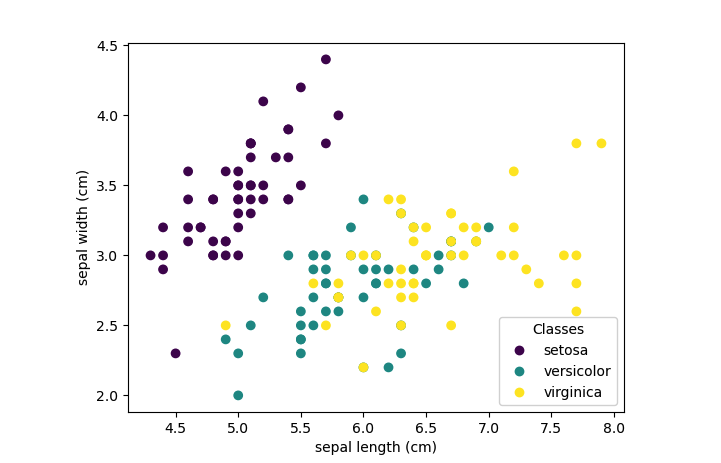

In [323]:
print(vqpca.principal_components[0].shape)
print(vqpca.A[0].shape)

(60, 3)
(4, 3)


In [2]:
nested_list = [[1, 2], [4, 5, 6, 7]]

flattened_list = [item for sublist in nested_list for item in sublist]
print(flattened_list)

[1, 2, 4, 5, 6, 7]


In [324]:
# reconstruction
reconstructed_Data_1 = vqpca.principal_components[0] @ np.transpose(vqpca.A[0]) + (centroids[0])
reconstructed_Data_2 = vqpca.principal_components[1] @ np.transpose(vqpca.A[1]) + (centroids[1])
reconstructed_Data_3 = vqpca.principal_components[2] @ np.transpose(vqpca.A[2]) + (centroids[2])
reconstructed_Data_4 = vqpca.principal_components[3] @ np.transpose(vqpca.A[3]) + (centroids[3])
#reconstructed_Data_5 = vqpca.principal_components[4] @ np.transpose(vqpca.A[4]) + (centroids[4])

IndexError: list index out of range

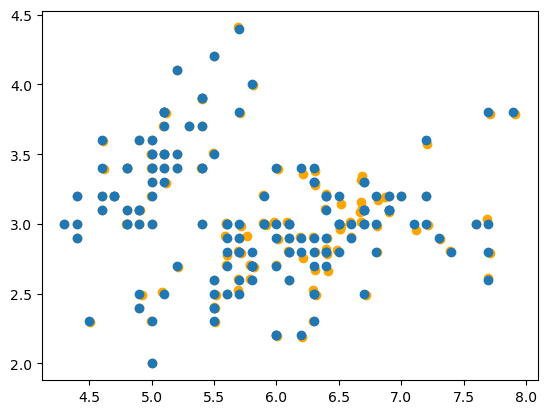

In [ ]:
plt.scatter(reconstructed_Data_1[:, 0], reconstructed_Data_1[:, 1], color='orange')
plt.scatter(reconstructed_Data_2[:, 0], reconstructed_Data_2[:, 1], color='orange')
plt.scatter(reconstructed_Data_3[:, 0], reconstructed_Data_3[:, 1], color='orange')
plt.scatter(reconstructed_Data_4[:, 0], reconstructed_Data_4[:, 1], color='orange')
#plt.scatter(reconstructed_Data_5[:, 0], reconstructed_Data_5[:, 1], color='orange')
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])


In [ ]:
print(vqpca.global_mean_squared_reconstruction_error)

0.003201227584987124
